# AUTHOR :-Pavan Tiwari

# GRIPMAR21 - The Spark Foundation- Data Science & Business Analytics Internship

# Task 02 : Prediction using Unsupervised ML

# Problem Statement: 
                   From the given 'IRIS' dataset predict the optimal number of clusters and represents it visually

#  Basic Requirment Of Libaray 

Importing the OS module for changing working Directory.

For Manipulation
              1) Pandas.
              2) Numpy.
Module for Data Visualisation. 
               1) Matplotlib
               2) Seaborn

sklearn for modelling

In [1]:
#Importing Libaries For Manipulation
import pandas as pd
import numpy as np

#importing Libaries for Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing Libaries for Scalling the data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#importing Libaries for modelling
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

from mpl_toolkits.mplot3d import Axes3D


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# Prepocessing Of Iris Dataset

In [5]:
Data = data.drop('Species' ,axis = 1)
y = data['Species']

In [6]:
#missing Values 
Data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

As we can see there is no Null value in the Dataset 

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Visulization Of Data

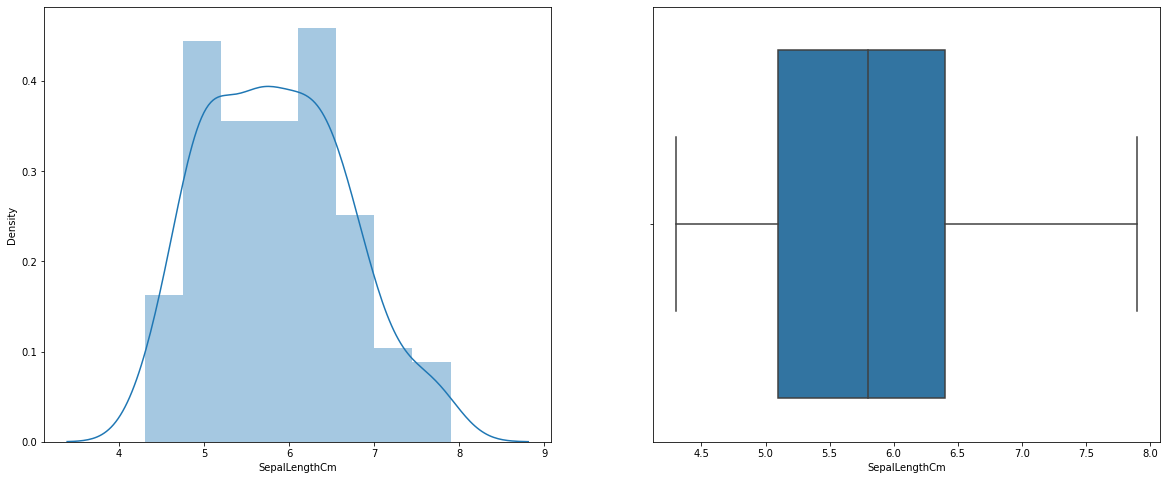

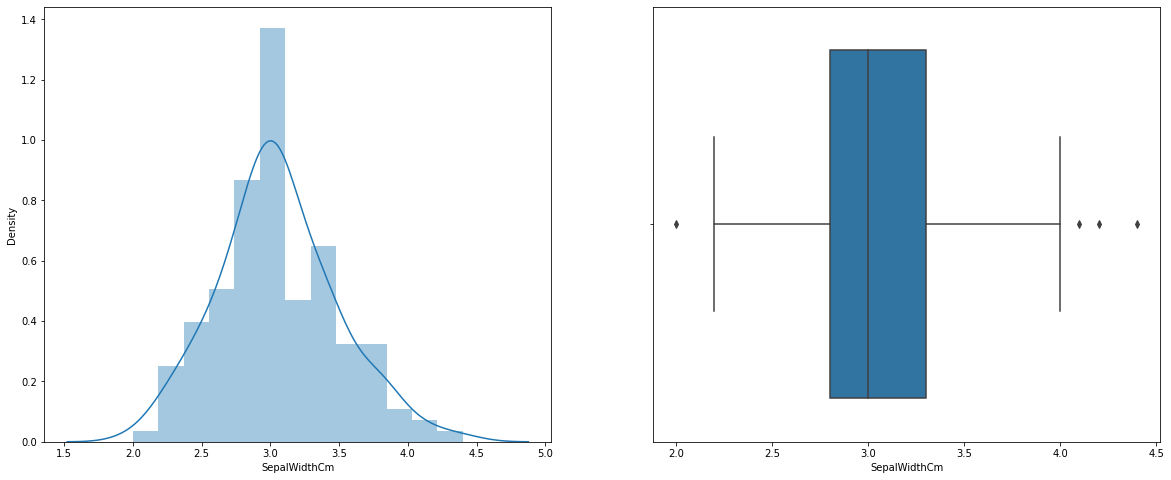

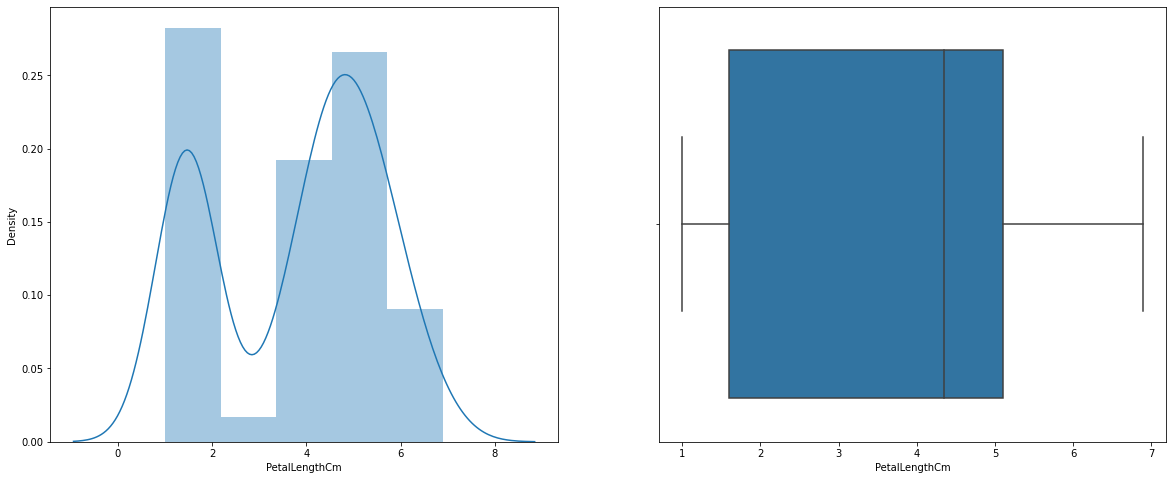

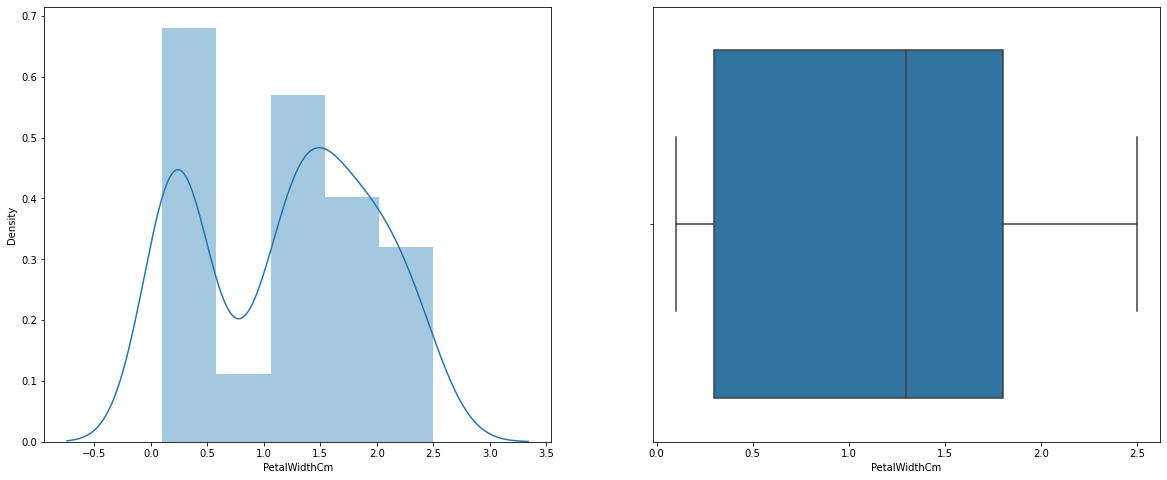

In [8]:
def plot_iris(Dataset , Feature):
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sns.distplot(Dataset[Feature])
    plt.subplot(1,2,2)
    sns.boxplot(Dataset[Feature])
    plt.show()

plot_iris(Data,'SepalLengthCm')
plot_iris(Data,'SepalWidthCm')
plot_iris(Data,'PetalLengthCm')
plot_iris(Data,'PetalWidthCm')


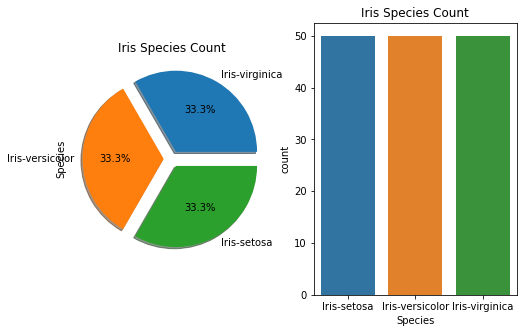

In [9]:
f,ax=plt.subplots(1,2,figsize=(8,5))
data['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Iris Species Count')
sns.countplot('Species',data=data,ax=ax[1])
ax[1].set_title('Iris Species Count')
plt.show()

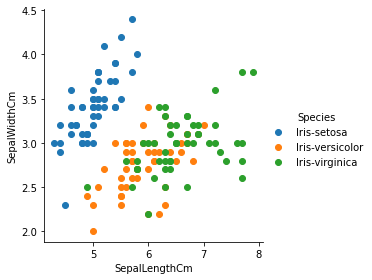

In [11]:
# Plotting species for Sepal
sns.FacetGrid(data, hue="Species", size=4).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

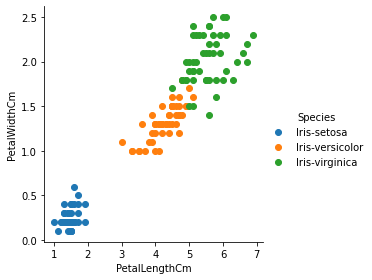

In [12]:
# Plotting species for petals
sns.FacetGrid(data, hue="Species", size=4).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

Observed that the species are nearly linearly separable with petal size, but sepal sizes are more mixed.This is an indication that the Petals can help in better and accurate Predictions over the Sepal

But from above you can also see that iris-versicolor ad iris - virginica are more clustered with each other 

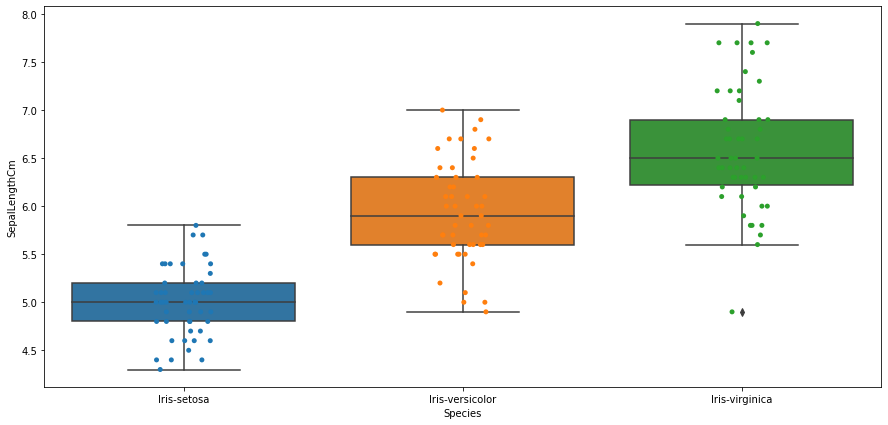

In [14]:
fig=plt.gcf()
fig.set_size_inches(15,7)
fig=sns.boxplot(x='Species',y='SepalLengthCm',data=data)
fig=sns.stripplot(x='Species',y='SepalLengthCm',data=data,jitter=True,edgecolor='yellow')

We can observe from the box plot of Iris-Virginica , there are some outliers

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

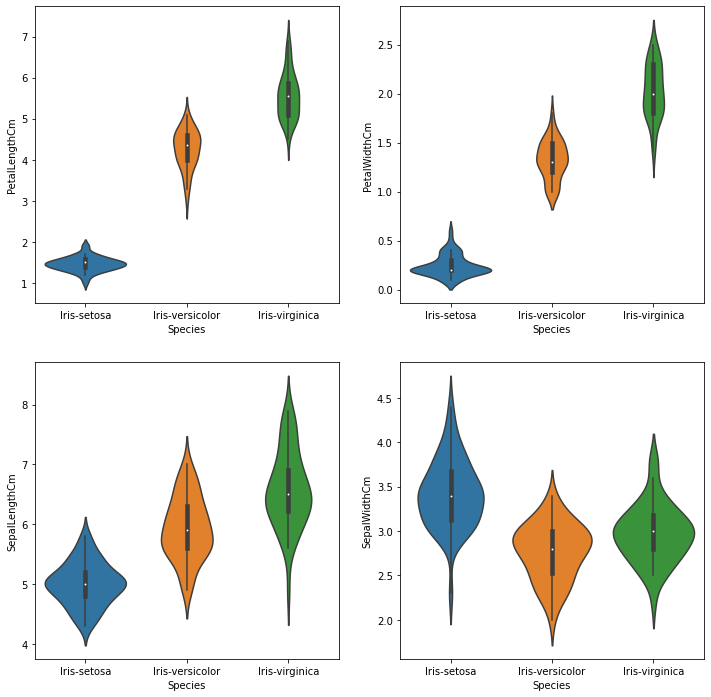

In [13]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

# Converting Species to numeric

In [15]:
def y_label(invalue):
    if invalue == 'Iris-setosa':
        return 1
    elif invalue == 'Iris-virginica':
        return 0
    else :
        return 2
df1 = pd.DataFrame(data=y.values, columns=['species'])

df1['index']=df1['species'].apply(y_label) 

## Scaling the data

In [17]:
std_scale = StandardScaler().fit(Data)
data_scaled = std_scale.transform(Data)

X_scaled = pd.DataFrame(data_scaled, columns = Data.columns)

X_scaled.sample(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
70,-0.103925,0.068662,0.337848,0.592162,0.790591
149,1.720542,0.068662,-0.124958,0.762759,0.790591
9,-1.512691,-1.143017,0.106445,-1.284407,-1.444450
97,0.519627,0.432165,-0.356361,0.307833,0.133226
131,1.304841,2.492019,1.726266,1.502013,1.053537


In [19]:
len(data_scaled)

150

# Predicting and modelling

#### (i).Scatter plot to visualise the scaled data and intial centriods for given K -clusters (K-Means)

In [31]:
def plot_kmeas_scale(k):
    model = KMeans(n_clusters = k , random_state=123)
    model.fit(data_scaled)
    labels = model.predict(data_scaled)
    centroid = model.cluster_centers_
    colors=['r','g','p','b','o','y','m','w']
    fig = plt.figure(1, figsize=(3,3))
    kx = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=120)
    for i in range(k):
        points = np.array([data_scaled[j] for j in range(len(data_scaled)) if labels[j]>=i])
        kx.scatter(points[:, 3], points[:, 0], points[:, 2],s=5, cmap='jet')#colors[i]) 
        kx.scatter(centroid[:,0],centroid[:,1],marker='*',s=200,c='red')
      
        #plt.title('Number of clusters = {}'.format(k))
        plt.show()
    #print(points)
    #print(10*'*'*10)
    #print(centroid)

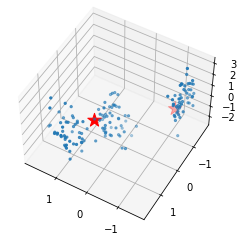

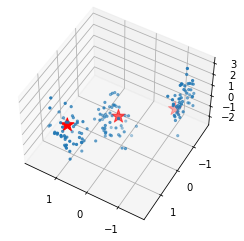

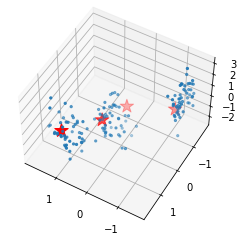

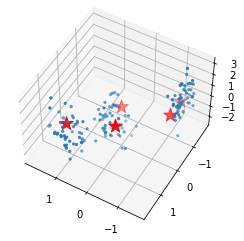

In [32]:
k=5
for i in range(k+1):
    if  i>1 :
        plot_kmeas_scale(i)

### (ii) Finding optimal number of clusters - Plot Scree pot/Elbow Plot

The technique we use to determine optimum K, the number of clusters, is called the elbow method.

Text(3.1, 5001, 'optimal number of clusters = 3')

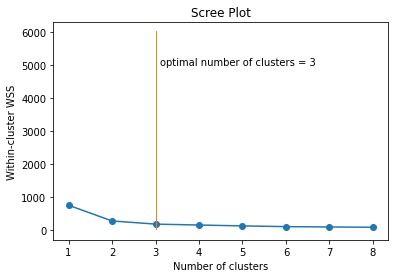

In [34]:
k = 9
WSS = []
for k in range(1,9):
    kmeans = KMeans(n_clusters=k , random_state=123)
    kmeans.fit(data_scaled)
    WSS.append(kmeans.inertia_)
plt.plot(range(1,9), WSS, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster WSS")
plt.title("Scree Plot")
plt.plot([3]*6000, range(1,6001), ",")
plt.text(3.1, 5001, "optimal number of clusters = 3")
    

### (iii). K-means clustering with 3 optimal Clusters

In [35]:
km =  KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 123)

In [37]:
km.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [38]:
predicted_cluster = km.predict(data_scaled)
predicted_labels = km.labels_

In [39]:
predicted_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
predicted_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 0.92, 'K Means')

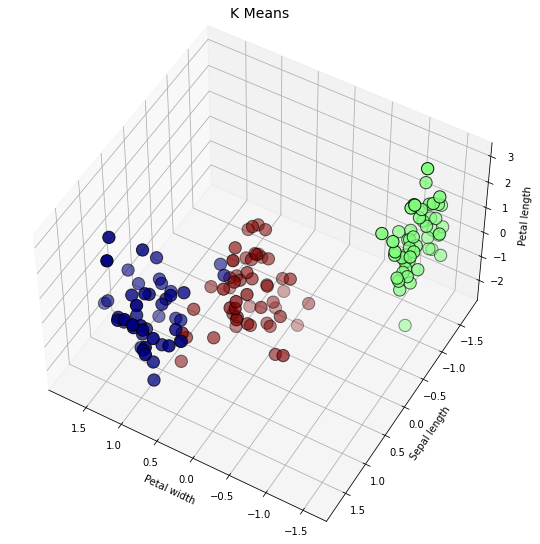

In [41]:
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=120)
ax.scatter(data_scaled[:, 3], data_scaled[:, 0], data_scaled[:, 2],
          c=predicted_labels.astype(np.float), cmap='jet',edgecolor="k", s=150)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

### (vi) Comparing Clustered data with original data for defining boundaries of 3 clusters(k-means)

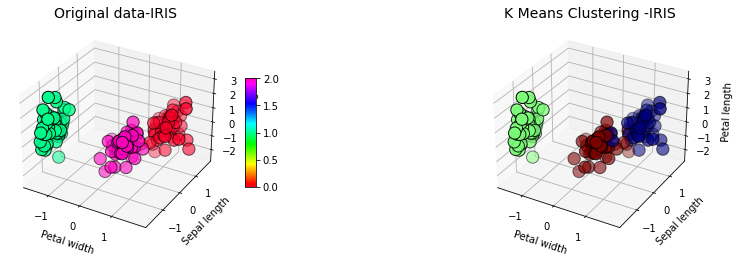

In [42]:
from matplotlib import cm

fig = plt.figure(figsize=plt.figaspect(0.25))
ax = fig.add_subplot(1, 2, 1, projection='3d')

surf =ax.scatter(data_scaled[:, 3], data_scaled[:, 0],data_scaled[:, 2],
          c=df1['index'],  cmap='gist_rainbow',edgecolor="k", s=150)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")

plt.title("Original data-IRIS", fontsize=14)

fig.colorbar(surf, shrink=0.5, aspect=10)

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter(data_scaled[:, 3], data_scaled[:, 0], data_scaled[:, 2],
           c=predicted_labels.astype(np.float), cmap='jet',edgecolor='k', s=150)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means Clustering -IRIS", fontsize=14)
plt.show()

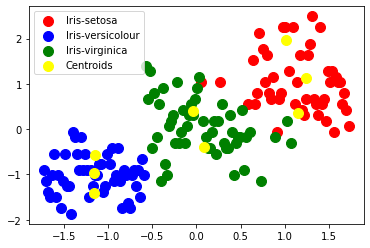

In [46]:
plt.scatter(data_scaled[predicted_cluster == 0, 0], data_scaled[predicted_cluster == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data_scaled[predicted_cluster == 1, 0], data_scaled[predicted_cluster == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data_scaled[predicted_cluster == 2, 0], data_scaled[predicted_cluster == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### (vi) Create cluster profiles compare with Original Data labels

In [43]:
def predict_species (invalue):
    if invalue == 1:
        return 'Iris-setosa' 
    elif invalue == 0 :
        return 'Iris-virginica'
    else :
        return 'Iris-versicolor'
df1['predict_label']= pd.DataFrame(data=predicted_labels, columns=['predict_label'])

df1['predict_species']=df1['predict_label'].apply(predict_species) 


In [44]:
sum(np.where((df1['species']!=df1['predict_species']),1,0))

7

In [45]:
df1[df1['species']!=df1['predict_species']]

,species,index,predict_label,predict_species
77,Iris-versicolor,2,0,Iris-virginica
86,Iris-versicolor,2,0,Iris-virginica
101,Iris-virginica,0,2,Iris-versicolor
106,Iris-virginica,0,2,Iris-versicolor
113,Iris-virginica,0,2,Iris-versicolor
119,Iris-virginica,0,2,Iris-versicolor
121,Iris-virginica,0,2,Iris-versicolor


By K-means clustering with number of clusters=3 , we are able to cluster 143 species correctly out of 150 species.The cluster Iris-versicolor and Iris-virginica are misclustered.

# Thank You Task -2 Ends Here